# **Mount Drive + set ROOT**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ROOT = "/content/drive/MyDrive/HiCForecast_Project/HiCForecast"
RUN_DIR = "/content/drive/MyDrive/HiCForecast_Project/runs/20260118_101729"

Mounted at /content/drive


# **Enable GPU**

In [27]:
!nvidia-smi

Sun Jan 18 10:13:15 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# **Fix PyTorch to CUDA**

In [7]:
!pip -q uninstall -y torch torchvision torchaudio

In [8]:
!pip -q install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.4/780.4 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 96.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 114.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 102.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 124.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [12]:
import torch
print(torch.__version__, torch.cuda.is_available())

2.9.0+cu126 True


In [13]:
!pip -q install -U tensorboard==2.19.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 109.4 MB/s eta 0:00:00


In [14]:
import tensorboard
print(tensorboard.__version__)

2.19.0


# **Install requirement**

In [10]:
!pip -q install --no-cache-dir "numpy==2.0.2"
!pip -q install --no-cache-dir pandas==2.2.2 scipy scikit-image scikit-learn matplotlib

In [7]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

print("numpy:", np.__version__)
print("pandas:", pd.__version__)

numpy: 2.0.2
pandas: 2.2.2


# **Confirm .cool files exist**

In [4]:
%cd $ROOT
!ls -lh example_data/*.cool

/content/drive/MyDrive/HiCForecast_Project/HiCForecast
-rw------- 1 root root 30M Feb  7  2025 example_data/8cell.cool
-rw------- 1 root root 33M Feb  7  2025 example_data/early_2cell.cool
-rw------- 1 root root 40M Feb  7  2025 example_data/ICM.cool
-rw------- 1 root root 32M Feb  7  2025 example_data/late_2cell.cool
-rw------- 1 root root 33M Feb  7  2025 example_data/mESC_500.cool
-rw------- 1 root root 30M Feb  7  2025 example_data/PN5.cool


# **Preprocess chr19**

In [18]:
ROOT = "/content/drive/MyDrive/HiCForecast_Project/HiCForecast"
%cd $ROOT
!mkdir -p example_data/processed
%cd $ROOT/scripts

!python3 makedata.py \
  --ficool_dir ./../example_data/ \
  --sub_mat_n 64 \
  --output_folder ./../example_data/processed/ \
  --timepoints PN5 early_2cell late_2cell 8cell ICM mESC_500 \
  --chromosomes chr19


/content/drive/MyDrive/HiCForecast_Project/HiCForecast
/content/drive/MyDrive/HiCForecast_Project/HiCForecast/scripts
chr19 (6, 490, 64, 64) (490, 6, 64, 64) (6, 490, 2) (490, 6, 2)
Chromosome saved.
mat_chr2.shape:  (1, 1534, 1534)
mat_chr2.shape:  (1, 1534, 1534)
mat_chr2.shape:  (1, 1534, 1534)
mat_chr2.shape:  (1, 1534, 1534)
mat_chr2.shape:  (1, 1534, 1534)
mat_chr2.shape:  (1, 1534, 1534)
ground_truth.shape:  (6, 1534, 1534)
Ground truth saved.


In [19]:
# Confirm the index file exists:
%cd $ROOT
!find example_data/processed -name "data_gt_chr19_64.npy" -print
!find example_data/processed -name "data_chr19_64.npy" -print
!find example_data/processed -name "data_index_chr19_64.npy" -print


/content/drive/MyDrive/HiCForecast_Project/HiCForecast
example_data/processed/data_gt_chr19_64.npy
example_data/processed/input_patches/data_chr19_64.npy
example_data/processed/input_patches/data_index_chr19_64.npy


# **Make train_patches folder**

In [20]:
%cd $ROOT
!mkdir -p example_data/processed/train_patches

!cp -f example_data/processed/input_patches/data_chr19_64.npy example_data/processed/train_patches/ 2>/dev/null || true
!cp -f example_data/processed/data_patches/data_chr19_64.npy example_data/processed/train_patches/ 2>/dev/null || true

!ls -lh example_data/processed/train_patches

/content/drive/MyDrive/HiCForecast_Project/HiCForecast
total 46M
-rw------- 1 root root 46M Jan 18 10:08 data_chr19_64.npy


# **Baseline inference**

In [30]:
%cd $ROOT/scripts

!python3 inference.py \
  --max_HiC 300 \
  --patch_size 64 \
  --cut_off \
  --model_path ./../trained_model/HiCForecast.pkl \
  --data_path ./../example_data/processed/input_patches/data_chr19_64.npy \
  --output_path ./../HiCForecast_prediction \
  --file_index_path ./../example_data/processed/input_patches/data_index_chr19_64.npy \
  --no_batch_max \
  --gt_path ./../example_data/processed/data_gt_chr19_64.npy

/content/drive/MyDrive/HiCForecast_Project/HiCForecast/scripts
2026-01-18 10:15:11.184039: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768731311.426759    8024 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768731311.497105    8024 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768731311.982405    8024 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768731311.982447    8024 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768731311.9

In [31]:
%cd $ROOT
!ls -lh *prediction*.npy
!ls -lh *.npy | head -n 50

/content/drive/MyDrive/HiCForecast_Project/HiCForecast
-rw------- 1 root root 54M Jan 18 10:15 HiCForecast_prediction.npy
-rw------- 1 root root 54M Jan 18 10:15 HiCForecast_prediction.npy


In [1]:
import time, os, glob, shutil

RUN_ID = time.strftime("%Y%m%d_%H%M%S")
RUN_DIR = f"/content/drive/MyDrive/HiCForecast_Project/runs/{RUN_ID}"
os.makedirs(RUN_DIR, exist_ok=True)

pred_cands = glob.glob(f"{ROOT}/*prediction*.npy") + glob.glob(f"{ROOT}/HiCForecast_prediction*.npy")
print("pred candidates:", pred_cands)

pred_path = pred_cands[0]
shutil.copy(pred_path, f"{RUN_DIR}/pred_baseline.npy")
shutil.copy(f"{ROOT}/example_data/processed/data_gt_chr19_64.npy", f"{RUN_DIR}/gt_chr19.npy")

print("Saved:", RUN_DIR)
!ls -lh "$RUN_DIR"

NameError: name 'ROOT' is not defined

# **Evaluation Cell**

pred: (3, 1534, 1534) gt: (6, 1534, 1534)


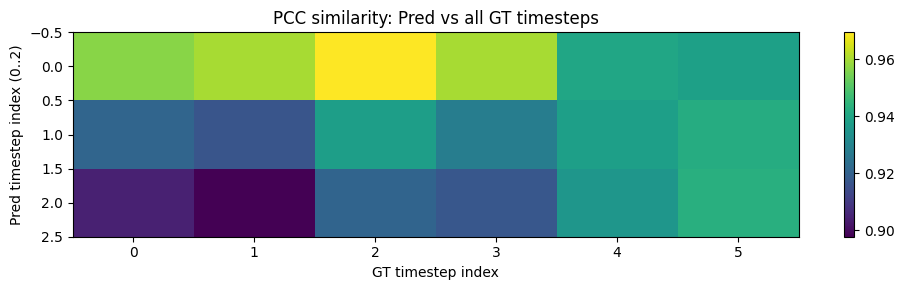

Best GT match for each pred: [2 5 5]


,pred_idx,matched_gt_idx,PCC_full,SSIM_full,PSNR_full,MAE_full,MSE_full,PCC_patch,SSIM_patch,PSNR_patch,num_patches_used
0,0,2,0.969538,0.987745,47.557716,0.919851,12.440922,0.975518,0.932288,28.374905,24
1,1,5,0.942221,0.960877,40.438133,1.105130,18.388224,0.937899,0.769066,23.726637,24
2,2,5,0.943142,0.960393,40.759242,1.104814,17.077679,0.938824,0.766887,24.098211,24


In [ ]:
pred = np.load(f"{RUN_DIR}/pred_baseline.npy")  # (3, N, N)
gt   = np.load(f"{RUN_DIR}/gt_chr19.npy")       # (T, N, N)

print("pred:", pred.shape, "gt:", gt.shape)

def pcc(a, b, eps=1e-12):
    a = a.astype(np.float64).ravel()
    b = b.astype(np.float64).ravel()
    a -= a.mean(); b -= b.mean()
    return float((a @ b) / (np.sqrt((a @ a) + eps) * np.sqrt((b @ b) + eps)))

def diagonal_patches(M, patch=60, stride=60):
    N = M.shape[0]
    out = []
    for s in range(0, N - patch + 1, stride):
        p = M[s:s+patch, s:s+patch]
        if np.any(p):
            out.append(p)
    return out

def avg_patch_metrics(X, Y, patch=60, stride=60):
    Xp = diagonal_patches(X, patch=patch, stride=stride)
    Yp = diagonal_patches(Y, patch=patch, stride=stride)
    m = min(len(Xp), len(Yp))
    if m == 0:
        return {"PCC_patch": np.nan, "SSIM_patch": np.nan, "PSNR_patch": np.nan, "num_patches_used": 0}
    pccs, ssims, psnrs = [], [], []
    for i in range(m):
        a, b = Xp[i], Yp[i]
        dr = float(a.max() - a.min() + 1e-12)
        pccs.append(pcc(a, b))
        ssims.append(ssim(a, b, data_range=dr))
        psnrs.append(psnr(a, b, data_range=dr))
    return {
        "PCC_patch": float(np.mean(pccs)),
        "SSIM_patch": float(np.mean(ssims)),
        "PSNR_patch": float(np.mean(psnrs)),
        "num_patches_used": m
    }

# similarity heatmap
T = gt.shape[0]
sim = np.zeros((pred.shape[0], T))
for i in range(pred.shape[0]):
    for t in range(T):
        sim[i, t] = pcc(pred[i], gt[t])

plt.figure(figsize=(10,3))
plt.imshow(sim, aspect="auto")
plt.colorbar()

plt.xlabel("GT timestep index")
plt.ylabel("Pred timestep index (0..2)")

plt.title("PCC similarity: Pred vs all GT timesteps")
plt.tight_layout()
plt.savefig(f"{RUN_DIR}/fig_similarity_heatmap.png", dpi=200)
plt.show()

best = sim.argmax(axis=1)
print("Best GT match for each pred:", best)

rows = []
for i in range(pred.shape[0]):
    t = int(best[i])
    X, Y = gt[t], pred[i]
    dr = float(X.max() - X.min() + 1e-12)
    row = {
        "pred_idx": i,
        "matched_gt_idx": t,
        "PCC_full": pcc(X, Y),
        "SSIM_full": float(ssim(X, Y, data_range=dr)),
        "PSNR_full": float(psnr(X, Y, data_range=dr)),
        "MAE_full": float(np.mean(np.abs(X - Y))),
        "MSE_full": float(np.mean((X - Y) ** 2)),
    }
    row.update(avg_patch_metrics(X, Y, patch=60, stride=60))
    rows.append(row)

df = pd.DataFrame(rows)
df.to_csv(f"{RUN_DIR}/metrics_baseline.csv", index=False)
df

# **Generate GT vs Pred vs Diff plots**

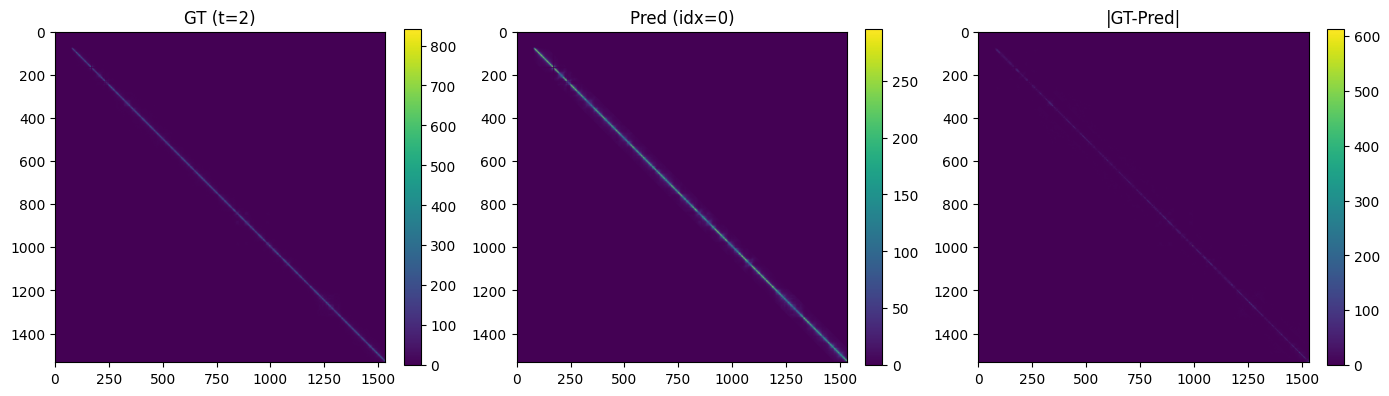

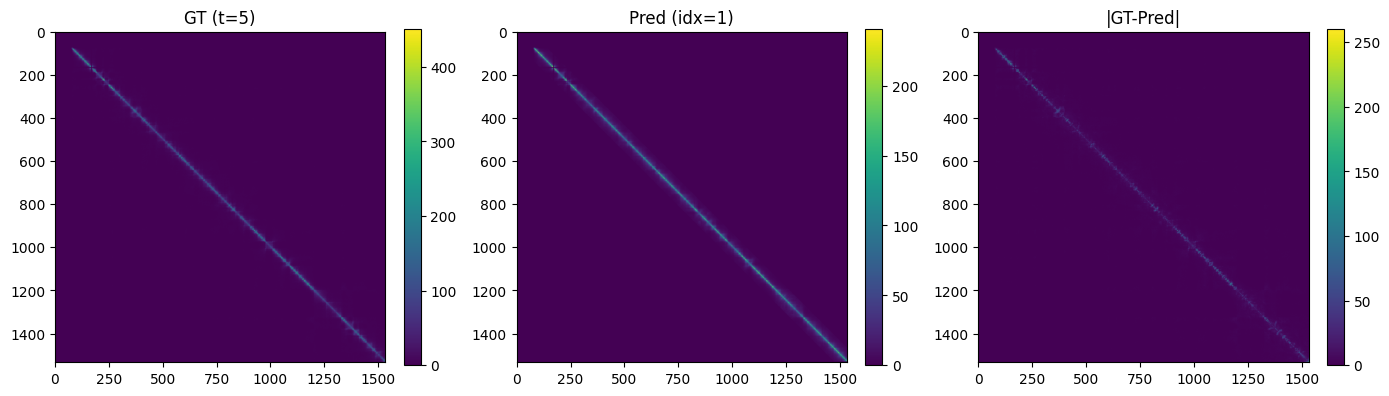

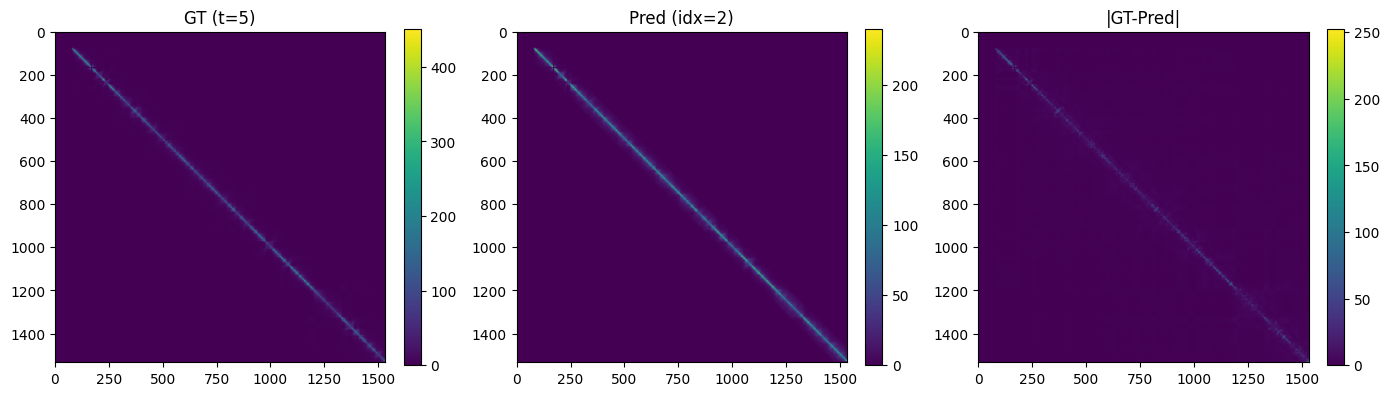

Saved to: /content/drive/MyDrive/HiCForecast_Project/runs/20260118_101729
total 109M
-rw------- 1 root root 225K Jan 18 10:28 fig_gt_pred_diff_pred0_gt2.png
-rw------- 1 root root 349K Jan 18 10:29 fig_gt_pred_diff_pred1_gt5.png
-rw------- 1 root root 446K Jan 18 10:29 fig_gt_pred_diff_pred2_gt5.png
-rw------- 1 root root  53K Jan 18 10:25 fig_similarity_heatmap.png
-rw------- 1 root root  54M Jan 18 10:17 gt_chr19.npy
-rw------- 1 root root  595 Jan 18 10:25 metrics_baseline.csv
-rw------- 1 root root  54M Jan 18 10:17 pred_baseline.npy


In [8]:
pred = np.load(f"{RUN_DIR}/pred_baseline.npy")
gt   = np.load(f"{RUN_DIR}/gt_chr19.npy")

def pcc(a, b, eps=1e-12):
    a = a.astype(np.float64).ravel()
    b = b.astype(np.float64).ravel()
    a -= a.mean(); b -= b.mean()
    return float((a @ b) / (np.sqrt((a @ a) + eps) * np.sqrt((b @ b) + eps)))

T = gt.shape[0]
sim = np.zeros((pred.shape[0], T))
for i in range(pred.shape[0]):
    for t in range(T):
        sim[i, t] = pcc(pred[i], gt[t])
best = sim.argmax(axis=1)

for i in range(pred.shape[0]):
    t = int(best[i])
    X, Y = gt[t], pred[i]
    D = np.abs(X - Y)

    plt.figure(figsize=(14,4))
    plt.subplot(1,3,1); plt.title(f"GT (t={t})"); plt.imshow(X); plt.colorbar(fraction=0.046)
    plt.subplot(1,3,2); plt.title(f"Pred (idx={i})"); plt.imshow(Y); plt.colorbar(fraction=0.046)
    plt.subplot(1,3,3); plt.title("|GT-Pred|"); plt.imshow(D); plt.colorbar(fraction=0.046)
    plt.tight_layout()
    plt.savefig(f"{RUN_DIR}/fig_gt_pred_diff_pred{i}_gt{t}.png", dpi=200)
    plt.show()

print("Saved to:", RUN_DIR)
!ls -lh "$RUN_DIR"